In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

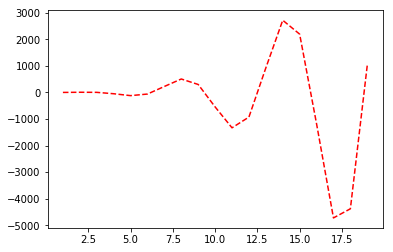

Shape (19,)


In [677]:
mu, sigma = 0, 500 # mean and standard deviation
x = np.arange(1., 20., 1) 
noise = np.random.normal(mu, sigma, x.shape[0])
y = x**3*np.sin(x) 
plt.plot(x, y, 'r--')
plt.show()
print('Shape',y.shape)
def sigmoid(x, derivative=False):
  return x*(1-x) if derivative else 1/(1+np.exp(-x))

In [0]:
## noi suy lagrange
class lagrange:
  def __init__(self,x,y):
    self.x = x
    self.y = y 
  def caculate(self,x_hat):
    total = 0 
    for index, y_single in enumerate(self.y):
      mul_temp = 1
      for x_single in self.x:
        if x_single != self.x[index]:
          mul_temp = mul_temp * ( x_hat - x_single ) / ( self.x[index] - x_single )
      total = total + mul_temp * y_single
    return total
  



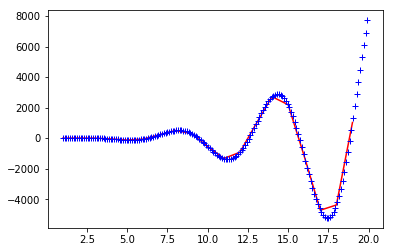

5.4390867092176307e+73


In [694]:
function = lagrange(x,y)
x_hat = np.arange( 1. , 20. , 0.11)
y_hat =  [ function.caculate(x_) for x_ in x_hat ]
plt.plot(x, y, 'r', x_hat,  y_hat , 'b+')
plt.show()
print(sin.caculate(10))

In [0]:
## noi suy newton
class newton:
  def __init__(self,x,y):
    self.x = x
    self.y = y 
    self.alpha = np.array([])
    self.caculate_parameter()
    print('alpha matrix :', self.alpha)
    
  def caculate_parameter(self):
    for index, y_single in enumerate(self.y):
      if index != 0 :
        total_temp = self.alpha[0]
        mul_temp = 1
        #print('============== y: ', y_single)
        for i , x_single in enumerate(self.x[ 0 : index ]):
            mul_temp = mul_temp * ( self.x[index] - x_single ) 
            if index != 1 and i < index - 1 : 
              #print( total_temp , ' + ' , self.alpha[i + 1] , ' * ' , mul_temp )
              total_temp = total_temp + self.alpha[i + 1] * mul_temp 
              #print('=> ',total_temp)
        #print('mul ',mul_temp)
        #print('total: ',total_temp)
        alpha_ = ( y_single - total_temp  ) / mul_temp
        self.alpha = np.append(self.alpha , [alpha_] , axis = 0 )
      else:
        self.alpha = np.append(self.alpha,[y_single],axis = 0)
      #print('alpha: ', self.alpha)
    
            
  def caculate(self,x_hat):
    total = self.alpha[0]
    for index, y_single in enumerate(self.y):
      #print(index)
      mul_temp = 1
      for x_single in self.x[0:index+1]:
        mul_temp = mul_temp * ( x_hat - x_single )
        #print('x :', x_single)
      #print('mul: ', mul_temp)
      if( index < self.alpha.shape[0] - 1) :
        total = total + mul_temp * self.alpha[index+1]
      #print('total: ', total)
      #print('======================')
    return total



In [684]:
newtonfn = newton(x,y)
newtonfn.caculate(10)

alpha matrix : [ 8.41470985e-01  6.43290843e+00 -4.94852381e+00 -6.48073552e+00
  2.85338746e+00  4.33736258e-01 -3.15914075e-01  2.61543951e-02
  7.65520981e-03 -1.60880447e-03  3.15611012e-05  2.06111358e-05
 -2.24866369e-06 -8.84244018e-09  1.84549800e-08 -1.26050471e-09
 -2.05820090e-11  7.43690682e-12 -3.47726596e-13]


-544.0211108893698

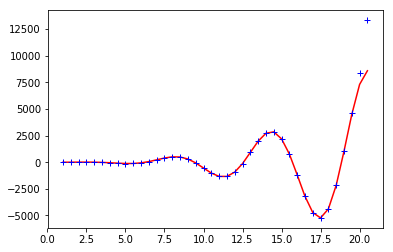

In [700]:
x_hat = np.arange( 1 , 21, 0.5)
y_hat =  [ newtonfn.caculate(x_) for x_ in x_hat ]
plt.plot(x_hat,  x_hat**3*np.sin(x_hat) , 'r', x_hat,  y_hat , 'b+')
plt.show()